In [9]:
from Dataset1_2a import plot_graph_a, plot_graph_b, scalar_encoding
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("network_backup_dataset.csv")
days = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
work_flows = {'work_flow_0':0,'work_flow_1':1,'work_flow_2':2,'work_flow_3':3,'work_flow_4':4}

strip_data = data[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', \
'Work-Flow-ID', 'File Name','Size of Backup (GB)']].values
print strip_data

[[1 'Monday' 1 'work_flow_0' 'File_0' 0.0]
 [1 'Monday' 1 'work_flow_2' 'File_12' 0.0]
 [1 'Monday' 1 'work_flow_2' 'File_13' 0.0]
 ...
 [15 'Sunday' 21 'work_flow_4' 'File_26' 0.19857243645989475]
 [15 'Sunday' 21 'work_flow_4' 'File_25' 0.1995700723304316]
 [15 'Sunday' 21 'work_flow_4' 'File_24' 0.2012005192156364]]


In [5]:
scal_data = np.array(scalar_encoding(strip_data))
One_HOT = np.array([])

for i in range(0,5):
    enc = LabelBinarizer()
    scal_data1 = enc.fit_transform(scal_data[:,i])
    if One_HOT.size == 0:
        One_HOT = scal_data1
    else:
        One_HOT = np.concatenate((One_HOT, scal_data1), axis = 1)
One_HOT = np.concatenate((One_HOT, strip_data[:,-1].reshape(-1,1)), axis = 1)


In [11]:
parameters = {'n_neighbors' : [1,2,5,10,20,50,100]}

gs = GridSearchCV(KNeighborsRegressor(),parameters, cv = 10, \
                  scoring = "neg_mean_squared_error", return_train_score = True)

gs.fit(One_HOT[:,:-1], One_HOT[:,-1])

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [12]:
print sqrt(-gs.best_score_)
print gs.cv_results_
print gs.best_estimator_

0.025547381695
{'rank_test_score': array([6, 4, 3, 1, 2, 5, 7], dtype=int32), 'split6_test_score': array([-0.00504497, -0.00209723, -0.0023687 , -0.00071652, -0.00102694,
       -0.00328584, -0.0032682 ]), 'param_n_neighbors': masked_array(data=[1, 2, 5, 10, 20, 50, 100],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'split7_train_score': array([-0.        , -0.00321773, -0.00218102, -0.00146867, -0.00176604,
       -0.00294229, -0.00467501]), 'split0_train_score': array([-0.        , -0.00267846, -0.00219063, -0.00147146, -0.00174308,
       -0.00293831, -0.00451483]), 'split2_test_score': array([-0.00240316, -0.0025109 , -0.00230993, -0.00067239, -0.00118611,
       -0.00360104, -0.00323346]), 'mean_fit_time': array([0.36410728, 0.36986306, 0.39925685, 0.36794465, 0.36121328,
       0.37130699, 0.36155343]), 'split3_train_score': array([-0.        , -0.00301724, -0.00217897, -0.0014742 , -0.00172455,
       -0.0

In [14]:
parameters = {'n_neighbors' : [1,2,5,10,20,50]}

gs = GridSearchCV(KNeighborsRegressor(metric = "manhattan"),parameters, cv = 10, \
                  scoring = "neg_mean_squared_error", return_train_score = True, verbose = 1)

gs.fit(One_HOT[:,:-1], One_HOT[:,-1])
print sqrt(-gs.best_score_)
print gs.cv_results_
print gs.best_estimator_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  7.5min finished


0.025547381695
{'rank_test_score': array([6, 4, 3, 1, 2, 5], dtype=int32), 'split6_test_score': array([-0.00504497, -0.00209723, -0.0023687 , -0.00071652, -0.00102694,
       -0.00328584]), 'param_n_neighbors': masked_array(data=[1, 2, 5, 10, 20, 50],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'split7_train_score': array([-0.        , -0.00321773, -0.00218102, -0.00146867, -0.00176604,
       -0.00294229]), 'split0_train_score': array([-0.        , -0.00267846, -0.00219063, -0.00147146, -0.00174308,
       -0.00293831]), 'split2_test_score': array([-0.00240316, -0.0025109 , -0.00230993, -0.00067239, -0.00118611,
       -0.00360104]), 'mean_fit_time': array([0.37285254, 0.3426239 , 0.36454751, 0.36186688, 0.37505021,
       0.34258657]), 'split3_train_score': array([-0.        , -0.00301724, -0.00217897, -0.0014742 , -0.00172455,
       -0.00292209]), 'split6_train_score': array([-0.        , -0.00276051, -0.00205803, 

In [23]:
parameters1 = {"n_neighbors": [10]}

gs1 = GridSearchCV(KNeighborsRegressor(metric = "manhattan"),parameters1, cv = 10, \
                  scoring = "neg_mean_squared_error", return_train_score = True, verbose = 2)

gs1.fit(One_HOT[:,:-1], One_HOT[:,-1])
print sqrt(-gs1.best_score_)
print gs1.cv_results_
print gs1.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_neighbors=10, total=   1.5s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV] ................................... n_neighbors=10, total=   1.4s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.4s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.5s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.4s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.4s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.5s
[CV] n_neighbors=10 ..................................................
[CV] ................................... n_neighbors=10, total=   1.4s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


0.025547381695
{'rank_test_score': array([1], dtype=int32), 'split6_test_score': array([-0.00071652]), 'param_n_neighbors': masked_array(data=[10],
             mask=[False],
       fill_value='?',
            dtype=object), 'split7_train_score': array([-0.00146867]), 'split0_train_score': array([-0.00147146]), 'split2_test_score': array([-0.00067239]), 'mean_fit_time': array([0.37376575]), 'split3_train_score': array([-0.0014742]), 'split6_train_score': array([-0.00135751]), 'split9_test_score': array([-0.00045541]), 'std_test_score': array([9.42991682e-05]), 'params': [{'n_neighbors': 10}], 'std_fit_time': array([0.03637522]), 'std_score_time': array([0.02728696]), 'split8_test_score': array([-0.00065065]), 'std_train_score': array([4.17874588e-05]), 'split4_test_score': array([-0.00073072]), 'split1_train_score': array([-0.0014809]), 'split2_train_score': array([-0.00140231]), 'split4_train_score': array([-0.0014272]), 'mean_score_time': array([1.07353082]), 'split9_train_score': ar

In [24]:
train_scores = [-0.00146867, -0.00147146, -0.0014742, -0.00135751,\
-0.0014809,-0.0014272, -0.00149309, -0.00144066, -0.00143009, -0.00140117]
print sqrt(-(sum(train_scores) / 10.0))

0.0380065125998


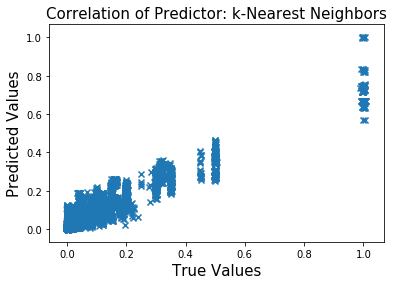

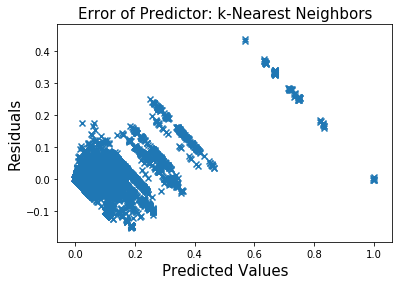

In [25]:
y_out = gs1.predict(One_HOT[:,:-1])

plot_graph_a(One_HOT[:,-1], y_out, "k-Nearest Neighbors")
plot_graph_b(y_out, (One_HOT[:,-1] - y_out), "k-Nearest Neighbors")